In [1]:
import geopandas as gpd, pandas as pd
%matplotlib inline

In [2]:
#load stat area (https://data.gov.il/dataset/statistical-area-2008), dissolve by town
gdf_stats = gpd.read_file('data/stat_area/stat_2008_NEW_04Nov_1335.shp', encoding='windows-1255')
#load town names
df_yishuv = pd.read_excel('data/bycode2018.xlsx', encoding='windows-1255')
##load stat area
df_stat_areas = pd.read_excel('data/cbs/מפתח-רחובותיים.xls', sheet_name=1, encoding='windows-1255')

In [3]:
len(df_yishuv)

1482

In [4]:
##clean gdf_stats
#rename columns
gdf_stats.rename(columns={'Shem_Yishu':'town',
                          'Shem_Yis_1':'town_eng',
                          'SEMEL_YISH':'town_code',
                          'STAT08':'stat_code'},inplace=True)

In [9]:

#filter out municipalities (>10000) and non defined areas (<0)
gdf_stats = gdf_stats.loc[(gdf_stats['town_code']<10000) & (gdf_stats['town_code']>0),
                         ['town_code','stat_code','town','town_eng','geometry']].reset_index(drop=True)
gdf_stats
# alist =gdf_stats.stat_code.unique()
# alist.sort()
# alist

,town_code,stat_code,town,town_eng,geometry
0,7,1,שחר,SHAHAR,"POLYGON ((175321.796 614938.868, 175333.156 61..."
1,10,1,תירוש,TIROSH,"POLYGON ((189452.960 628792.606, 189478.444 62..."
2,11,1,ניר חן,NIR HEN,"POLYGON ((174217.991 612806.233, 174229.531 61..."
3,13,1,חצבה,HAZEVA,"POLYGON ((227308.884 517640.396, 227283.976 51..."
4,15,1,נועם,NO'AM,"POLYGON ((180569.997 609600.979, 180595.378 60..."
...,...,...,...,...,...
3025,9700,34,הוד השרון,HOD HASHARON,"POLYGON ((190697.020 671104.439, 190700.480 67..."
3026,9800,1,בנימינה-גבעת עדה*,BINYAMINA-GIV'AT ADA,"POLYGON ((200839.511 715667.430, 200901.511 71..."
3027,9800,2,בנימינה-גבעת עדה*,BINYAMINA-GIV'AT ADA,"POLYGON ((196240.863 717579.139, 196241.190 71..."
3028,9800,3,בנימינה-גבעת עדה*,BINYAMINA-GIV'AT ADA,"POLYGON ((194269.540 715258.152, 194284.597 71..."


In [11]:
##clean df_stats_areas
df = df_stat_areas 
#rename columns
df.rename(columns={df.columns[0]:'town',
                   df.columns[1]:'town_code',
                   df.columns[2]:'stat_code',
                   df.columns[3]:'main_neighbourhoods',
                   df.columns[4]:'main_street'},inplace=True)
#set main street as first neighbourhoods if nan
df['main_street'] = [y.split(', ')[0] if x!=x else x for x, y in zip(df['main_street'], df['main_neighbourhoods'])]
df_stat_areas = df
df_stat_areas.head()

,town,town_code,stat_code,main_neighbourhoods,main_street
0,אבו סנאן,473,1,"אזור תעשייה, אלח'רוב, אלחלקאת, אלמלה, אלעקבה, ...",אזור תעשייה
1,אבו סנאן,473,2,"אלג'ורה, אלמפצלה, אלשוקפאן, הואדי, כרם אלרג'ומ...",אלג'ורה
2,אבו סנאן,473,3,"אבו-אלחסן, אלהדאפה, אלע'וזה, שכ' המסגד",אבו-אלחסן
3,אום אל-פחם,2710,11,עין אבראהים,עין אבראהים
4,אום אל-פחם,2710,12,"אלבאטן, אלג'זאלאת",אלבאטן
...,...,...,...,...,...
1943,תל אביב יפו,5000,946,נווה חן,"מח""ל, מבוא וולקר יוסף, דרך הטייסים, דרך ההגנה,..."
1944,תל אביב יפו,5000,947,ניר אביב,"גולינקין מרדכי, דרך בר-לב חיים, שד' ששת הימים,..."
1945,תל שבע,1054,1,"7, 6, 5, 4, 3, 21-אזור הספורט, 36","שכ 6, שכ 37, שכ 3, שכ 13, שכ 12"
1946,תל שבע,1054,2,"1, 2-מרכז, 12, 11, 10, 9, 8","שכ 9, שכ 37, שכ 26"


In [18]:
new_gdf_stats = gdf_stats.merge(df_stat_areas, on=['town_code','stat_code'], how='left')
#use town from gdf_stats hwen town_y is nan
new_gdf_stats['town_y'] = [x if y!=y else y for x,y in zip(new_gdf_stats['town_x'], new_gdf_stats['town_y'])]
#use town_y
new_gdf_stats = new_gdf_stats.drop(columns=['town_x']).rename(columns={'town_y':'town'})
new_gdf_stats.tail()

,town_code,stat_code,town_eng,geometry,town,main_neighbourhoods,main_street
3025,9700,34,HOD HASHARON,"POLYGON ((190697.020 671104.439, 190700.480 67...",הוד השרון,אזור תעשייה - נאמן ב',"החרש, היובלים, המסגר, הנגר, הרקון"
3026,9800,1,BINYAMINA-GIV'AT ADA,"POLYGON ((200839.511 715667.430, 200901.511 71...",בנימינה-גבעת עדה,"הרחבה, יוספטל, שכ' עמידר (גבעת עדה)","הרימון ג""ע, הארזים ג""ע, ח""י ג""ע, הדקל ג""ע, הגב..."
3027,9800,2,BINYAMINA-GIV'AT ADA,"POLYGON ((196240.863 717579.139, 196241.190 71...",בנימינה-גבעת עדה,שכ' זבוטינסקי (בנימינה),"דרך המסילה, הגבורים, הדקל, הכרמל, המיסדים"
3028,9800,3,BINYAMINA-GIV'AT ADA,"POLYGON ((194269.540 715258.152, 194284.597 71...",בנימינה-גבעת עדה,"גבעת חן, גני בנימינה, זרעוניה, נחלת בנימין , ש...","דרך העליה, הנביאים, החבצלת, דרך העצמאות, דרך נ..."
3029,9800,4,BINYAMINA-GIV'AT ADA,"POLYGON ((195435.200 713909.499, 195440.970 71...",בנימינה-גבעת עדה,"אזור תעשייה רכבת, יעקב, כרמי בנימינה, שכ' עמיד...","הטחנה, דרך המסילה, דרך העליה, האסיף, הברוש"


In [19]:
len(new_gdf_stats.town.unique())

1195

In [5]:
# #merge dis_stats area
# merged = gdf_stats.merge(df_yishuv, left_on='SEMEL_YISH', right_on='סמל יישוב', how='inner')
# #remove columns and rename
# merged_clean = merged[['SEMEL_YISH', 'Shem_Yishu', 'Shem_Yis_1', 'geometry']]
# merged_clean = merged_clean.rename(columns={'SEMEL_YISH':'town_code',
#                                             'Shem_Yishu':'town_name',
#                                             'Shem_Yis_1':'town_name_heb'})

In [25]:

#load covid by area (https://data.gov.il/dataset/covid-19)
covid_area_df = pd.read_excel("data/geographic-summary-per-day-2020-06-07.xlsx", encoding='windows-1255')
## rename
covid_area_df.rename(columns={'agas_code':'stat_code'}, inplace=True)

#remove cases without town code
covid_area_df = covid_area_df.loc[covid_area_df['town_code']!=0].reset_index(drop=True)
covid_area_df.head()

,town_code,stat_code,date,accumulated_cases,new_cases_on_date,accumulated_recoveries,new_recoveries_on_date,accumulated_hospitalized,new_hospitalized_on_date,accumulated_deaths,new_deaths_on_date,town
0,28,NaN,2020-03-26,<15,True,<15,False,<15,False,<15,False,מזכרת בתיה
1,28,NaN,2020-03-27,<15,False,<15,False,<15,False,<15,False,מזכרת בתיה
2,28,NaN,2020-03-28,<15,False,<15,False,<15,False,<15,False,מזכרת בתיה
3,28,NaN,2020-03-29,<15,False,<15,False,<15,False,<15,False,מזכרת בתיה
4,28,NaN,2020-03-30,<15,False,<15,False,<15,True,<15,False,מזכרת בתיה


In [31]:
#set -999 stat code
covid_area_df.loc[covid_area_df.stat_code.isna(), 'stat_code'] = -999
##table of towns without code
no_stat_towns = covid_area_df.loc[covid_area_df.stat_code == -999,['town','town_code']].drop_duplicates().reset_index(drop=True)

In [45]:
covid_area_df.loc[(covid_area_df.town_code.isin(no_stat_towns['town_code'])) & (covid_area_df.stat_code==-999),['town_code','town','stat_code']]
covid_area_df.loc[covid_area_df.town=='מזכרת בתיה','stat_code'].unique()

array([-999.])

In [72]:
covid_area_df_stats = covid_area_df.loc[covid_area_df.stat_code!=-999]


In [ ]:

def extrapolateCasesUnder15(case_df):
    df_copy = case_df.copy()
    #covid_area_df_stats

    ##unique town_stat_code
    unique_town_stat = case_df[['town_code','stat_code']].drop_duplicates().reset_index(drop=True)

    #convert <15 to accumulted case/recoveries/hopsitalized/death number based on new_*_on_date==True, and assuming 1 new per day
    for row in unique_town_stat.itertuples():
        df = covid_area_df_stats.loc[(covid_area_df_stats.town_code == row.town_code) &
                                    (covid_area_df_stats.stat_code == row.stat_code)]
    #     print(df)
        case_num=0
        recovery_num = 0
        hospt_num = 0
        death_num = 0
        for df_row in df.itertuples():
            ##accumulated_cases
            if df_row.accumulated_cases == '<15':
                if df_row.new_cases_on_date == True:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_cases'] = case_num +1
                    case_num+=1
                else:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_cases'] = case_num
            ##accumulated_recoveries
            if df_row.accumulated_recoveries == '<15':
                if df_row.new_recoveries_on_date == True:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_recoveries'] = recovery_num +1
                    recovery_num+=1
                else:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_recoveries'] = recovery_num
            ##accumulated_recoveries
            if df_row.accumulated_hospitalized == '<15':
                if df_row.new_hospitalized_on_date == True:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_hospitalized'] = hospt_num +1
                    hospt_num+=1
                else:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_hospitalized'] = hospt_num
            if df_row.accumulated_deaths == '<15':
                if df_row.new_deaths_on_date == True:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_deaths'] = death_num +1
                    death_num+=1
                else:
                    df_copy.loc[df_copy.index==df_row.Index, 'accumulated_deaths'] = death_num


    df_copy.to_csv('data/modified/modified_case_table.csv', encoding='windows-1255', index=False)


In [95]:
#load cases df
df_cases = pd.read_csv('data/modified/modified_case_table.csv', encoding='windows-1255')
df_cases.columns
df_cases = df_cases[['town_code', 'stat_code', 'date', 'accumulated_cases',
                     'accumulated_recoveries', 'accumulated_hospitalized','accumulated_deaths']]

data_cols = ['accumulated_cases','accumulated_recoveries', 'accumulated_hospitalized','accumulated_deaths']
df_cases.head()


,town_code,stat_code,date,accumulated_cases,accumulated_recoveries,accumulated_hospitalized,accumulated_deaths
0,31,1.0,2020-03-29,1,0,0,0
1,31,1.0,2020-03-30,1,0,0,0
2,31,1.0,2020-03-31,1,0,0,0
3,31,1.0,2020-04-01,1,0,0,0
4,31,1.0,2020-04-02,1,0,0,0


In [93]:
#date list
dates = df_cases['date'].unique()
dates.sort()
dates

array(['2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
       '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
       '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
       '2020-05-10', '2020-05-11', '2020-05-12', '2020-

In [117]:
from matplotlib import colors
import matplotlib.pyplot as plt

In [115]:
vmax= df_cases.accumulated_cases.max()

array(['2020-06-07', '2020-06-06', '2020-06-05', '2020-06-04',
       '2020-06-03', '2020-06-02', '2020-06-01', '2020-05-31',
       '2020-05-30', '2020-05-29', '2020-05-28', '2020-05-27',
       '2020-05-26', '2020-05-25', '2020-05-24', '2020-05-23',
       '2020-05-22', '2020-05-21', '2020-05-20', '2020-05-19',
       '2020-05-18', '2020-05-17', '2020-05-16', '2020-05-15',
       '2020-05-14', '2020-05-13', '2020-05-12', '2020-05-11',
       '2020-05-10', '2020-05-09', '2020-05-08', '2020-05-07',
       '2020-05-06', '2020-05-05', '2020-05-04', '2020-05-03',
       '2020-05-02', '2020-05-01', '2020-04-30', '2020-04-29',
       '2020-04-28', '2020-04-27', '2020-04-26', '2020-04-25',
       '2020-04-24', '2020-04-23', '2020-04-22', '2020-04-21',
       '2020-04-20', '2020-04-19', '2020-04-18', '2020-04-17',
       '2020-04-16', '2020-04-15', '2020-04-14', '2020-04-13',
       '2020-04-12', '2020-04-11', '2020-04-10', '2020-04-09',
       '2020-04-08', '2020-04-07', '2020-04-06', '2020-

2020-06-07


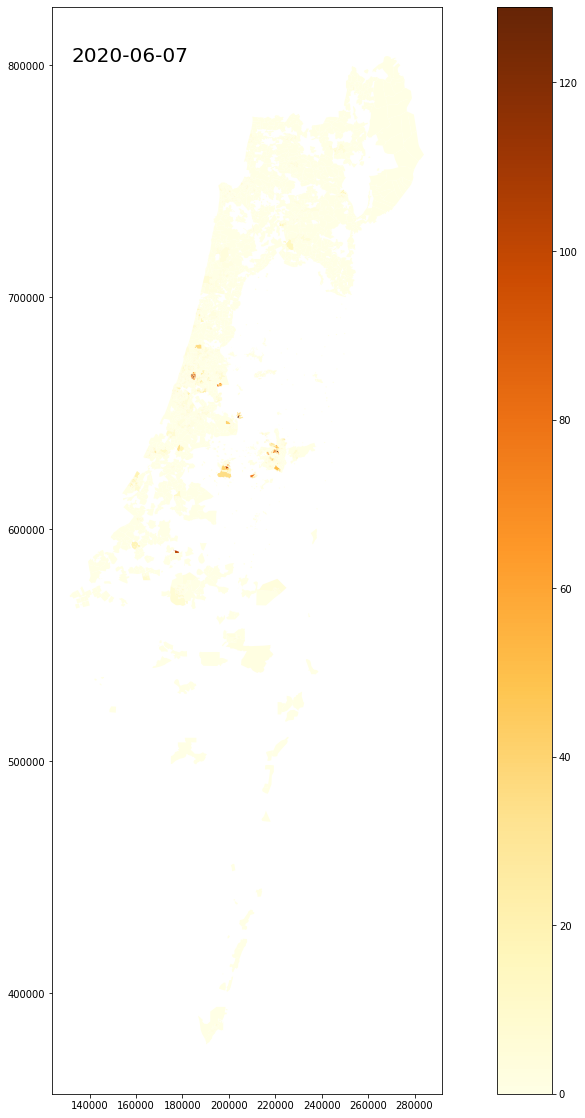

In [141]:
### accumulated cases

norm = colors.Normalize(vmin=0.,vmax=vmax)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlOrBr')

for date in dates[::-1]:
    fig, ax = plt.subplots(figsize=(20, 20))
    print(date)
    df_date = df_cases.loc[df_cases.date==date]
    merged_df = new_gdf_stats.merge(df_date, on=['town_code','stat_code'], how='outer')
    merged_df.loc[:, data_cols] = merged_df.loc[:, data_cols].fillna(0)
#     print(merged_df.loc[merged_df.accumulated_cases!=0])
    merged_df.plot(column='accumulated_cases', edgecolor='lightgrey', linewidth=0, cmap='YlOrBr', legend=False,norm=norm, ax=ax)
    fig.colorbar(cbar, ax=ax)
    ax.text(0.05,0.95,date, fontsize=20, transform=ax.transAxes)
    break

In [51]:
#find missing towns (not in stats area)
test = merged_clean.merge(covid_area_df, on='town_code', how='outer')
missing_towns =test.loc[test.town_name_heb.isna(),['town_code','town']].drop_duplicates()

In [74]:
merged_clean.loc[merged_clean.town_name=='יהוד']

,town_code,town_name,town_name_heb,geometry
1190,9400,יהוד,YEHUD,"POLYGON ((190631.731 660096.910, 190631.750 66..."


In [80]:
covid_area_df.loc[(covid_area_df.town_code==9400) & (covid_area_df.date=='2020-03-26')].head(10)

,town_code,agas_code,date,accumulated_cases,new_cases_on_date,accumulated_recoveries,new_recoveries_on_date,accumulated_hospitalized,new_hospitalized_on_date,accumulated_deaths,new_deaths_on_date,town
101245,9400,NaN,2020-03-26,15,True,<15,False,<15,False,<15,False,יהוד
101319,9400,1.0,2020-03-26,<15,True,<15,False,<15,False,<15,False,יהוד
101479,9400,4.0,2020-03-26,20,True,<15,False,<15,False,<15,False,יהוד
101559,9400,5.0,2020-03-26,<15,True,<15,False,<15,True,<15,False,יהוד
101633,9400,6.0,2020-03-26,<15,True,<15,False,<15,False,<15,False,יהוד
101710,9400,7.0,2020-03-26,<15,True,<15,False,<15,False,<15,False,יהוד


In [57]:
gdf_stats.loc[gdf_stats.SEMEL_YISH.isin(list(missing_towns['town_code']))]

,SEMEL_YISH,geometry,OBJECTID,STAT08,YISHUV_STA,Shem_Yishu,Shem_Yis_1,Shape_Leng,Shape_Area
931,1722,"POLYGON ((226283.880 765122.850, 226288.450 76...",1539,1,17220001,מגדל תפן,NaN,7819.967714,2.811067e+06


In [35]:
#combine town and covid cases
combined_df = merged_clean.merge(covid_area_df, on='town_code',)


103252

In [30]:
final_df = combined_df[['date','town_code','town_name','town_name_heb','accumulated_cases','geometry']].drop_duplicates()

In [72]:
date_list = combined_df['date'].unique()
for date in date_list:
    df = final_df.loc[final_df.date==date]
    print(df)
    break

             date  town_code     town_name   town_name_heb accumulated_cases  \
0      2020-03-26         28    מזכרת בתיה  MAZKERET BATYA               <15   
83     2020-03-26         31        אופקים          OFAQIM               <15   
687    2020-03-26         46         יבנאל        YAVNE'EL               <15   
765    2020-03-26         47      כפר תבור     KEFAR TAVOR               <15   
842    2020-03-26         53         עתלית           ATLIT               <15   
...           ...        ...           ...             ...               ...   
100889 2020-03-26       9400          יהוד           YEHUD               <15   
101049 2020-03-26       9400          יהוד           YEHUD                20   
101557 2020-03-26       9500  קריית ביאליק   QIRYAT BIALIK               <15   
101881 2020-03-26       9600      קריית ים      QIRYAT YAM               <15   
102339 2020-03-26       9700     הוד השרון    HOD HASHARON               <15   

                                       

In [ ]:
combined_df.to_file("covid_by_town.geojson", driver='GeoJSON', encoding='windows-1255')